<a href="https://colab.research.google.com/github/sk-108/Stock_Price_Prediction/blob/main/Copy_of_stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, requests, lxml
Required-by: 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data #used for web scraping purpose

In [ ]:
start = '2010-01-01'
end = '2019-12-31'
stock = ['AAPL']
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473095


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221161
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194138
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442256
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473095


In [ ]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


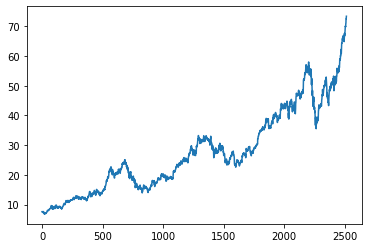

In [ ]:
plt.plot(df.Close)

In [ ]:
mavg100 = df.Close.rolling(100).mean()
mavg100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

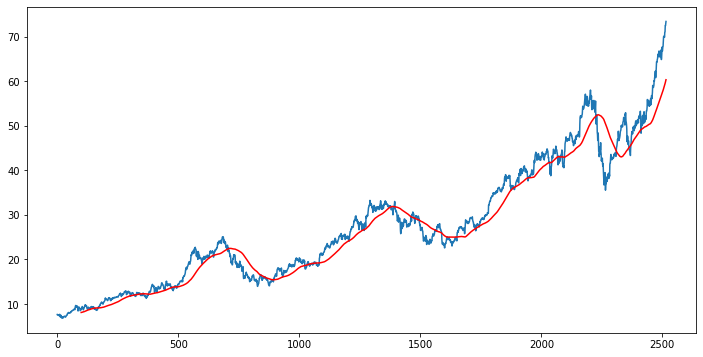

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')

In [ ]:
mavg200 = df.Close.rolling(200).mean()

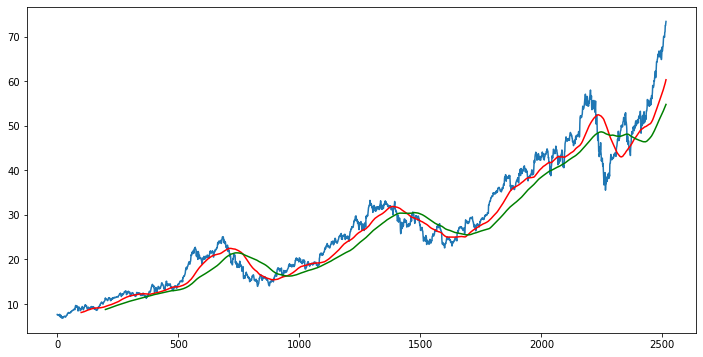

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(mavg100,'r')
plt.plot(mavg200,'g')

In [ ]:
df.shape

(2516, 5)

In [ ]:
#splitting data into training and testing 
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# print(data_training.shape())
# print(data_testing.shape())

In [ ]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]) :
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train ,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]],

       [[0.76668248],
        [0.7708505 ],
        [0.76317748],
        ...,
        [0.84388656],
        [0.85089656],
        [0.84616011]]])

In [ ]:
#ML Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import sequential
import keras

In [ ]:
model = keras.Sequential()
model.add(LSTM(units=50,activation = 'relu' , return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 18s 264ms/step - loss: 0.0687
Epoch 2/50
52/52 [==============================] - 15s 284ms/step - loss: 0.0135
Epoch 3/50
52/52 [==============================] - 15s 279ms/step - loss: 0.0113
Epoch 4/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0091
Epoch 5/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0100
Epoch 6/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 17s 320ms/step - loss: 0.0077
Epoch 8/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0075
Epoch 10/50
52/52 [==============================] - 14s 268ms/step - loss: 0.0073
Epoch 11/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0059
Epoch 12/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0067
Epoch 13/50
5

In [ ]:
# here we are doing time series analysis
model.save('keras_model.h5')

In [ ]:
data_training.tail(100) #we need to append so that we can have for testing y data

,Close
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
1665,27.370001
...,...
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [ ]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index= True)

In [ ]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]) :
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test , y_test = np.array(x_test),np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#making predictions
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([[0.18686193],
       [0.18762827],
       [0.18820867],
       [0.18859395],
       [0.18879938],
       [0.18887551],
       [0.18889564],
       [0.1889249 ],
       [0.18902072],
       [0.18921013],
       [0.1894944 ],
       [0.18987855],
       [0.19035837],
       [0.19091547],
       [0.19152848],
       [0.19217503],
       [0.19282974],
       [0.1935038 ],
       [0.19421056],
       [0.19495413],
       [0.19572315],
       [0.19649369],
       [0.19738029],
       [0.19848742],
       [0.1998825 ],
       [0.20160933],
       [0.20369083],
       [0.20611873],
       [0.20885596],
       [0.21183307],
       [0.21498649],
       [0.21825059],
       [0.2215237 ],
       [0.22476986],
       [0.22797687],
       [0.23113373],
       [0.23420818],
       [0.23717849],
       [0.24001838],
       [0.24270415],
       [0.24521595],
       [0.24755779],
       [0.24973345],
       [0.25172964],
       [0.25355503],
       [0.25521964],
       [0.2567258 ],
       [0.258

In [ ]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [ ]:
scaler.scale_  # gives us the factor for which it is scaled down so we divide ypred and ytest by this

array([0.02099517])

In [ ]:
scale_factor = 1/0.02099517
y_predict = y_predict*scale_factor
y_test = y_test*scale_factor

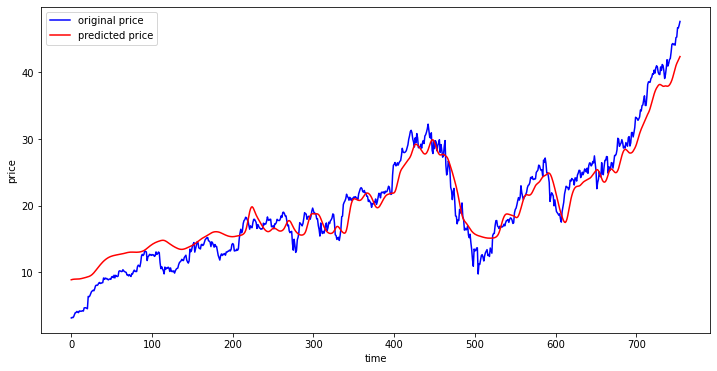

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="original price")
plt.plot(y_predict,'r',label="predicted price")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()